Make new Product Recommendations


Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.


Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) - ratings_Electronics_Ver3.tar.xzView in a new window (you may use winrar application to extract the .csv file)

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.


o The repository has several datasets. For this case study, please use the Electronics dataset.
o The host page has several pointers to scripts and other examples that can help with parsing the datasets.
o The data set consists of:
● 7,824,482 Ratings (1-5) for Electronics products.
● Other metadata about products. Please see the description of the fields available on the web page cited above.


o For convenience of future use, parse the raw data file (using Python, for example) and extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating
o Save these to a tab separated file. Name this file as product_ratings.csv.

Steps -
1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.
8. Summarise your insights.

Mark Distributions -
Step - 1,2,3,8 - 5 marks each
Step - 4,5,6,7 - 10 marks each

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo.ipynb

For Ex - Recommendation Systems_R5_Project.ipynb
Github link: https://classroom.github.com/a/WSWMHTtWLinks to an external site.

#### Load necessary libraries

In [134]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders
import Evaluation as Evaluation

### 1.Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

The dataset has columns - userID, prodcutid, ratings, timestamp

In [152]:
columns = ['userID', 'productID', 'ratings','timestamp']

In [153]:
ratings_df = pd.read_csv('ratings_Electronics.csv',header = None, names=columns)

In [154]:
ratings_df.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [155]:
ratings_df.shape

(7824482, 4)

In [156]:
ratings_df.isna().sum() # No null values found. Data is clean

userID       0
productID    0
ratings      0
timestamp    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C8A348080>]],
      dtype=object)

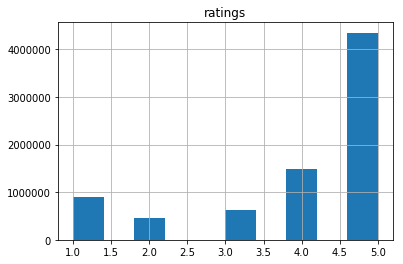

In [158]:
ratings_df.hist('ratings',bins = 10)

In [159]:
ratings_df.drop('timestamp', axis=1, inplace=True)# dropping as not needed field

In [160]:
print('Number of unique users', len(ratings_df['userID'].unique()))

Number of unique users 4201696


In [161]:
 print('Number of unique products', len(ratings_df['productID'].unique()))

Number of unique products 476002


In [175]:
temp_ratings1 = ratings_df[ratings_df['ratings'] < 2.0]

In [176]:
print('Number of unique products rated low',len(temp_ratings1['productID'].unique()))

Number of unique products rated low 176283


In [177]:
temp_ratings2 = ratings_df[(ratings_df['ratings'] > 2.0) & (ratings_df['ratings'] < 4.0)]

In [178]:
print('Number of unique products rated medium',len(temp_ratings2['productID'].unique()))

Number of unique products rated medium 152827


In [179]:
temp_ratings3 = ratings_df[(ratings_df['ratings'] > 4.0)]

In [180]:
print('Number of unique products rated High',len(temp_ratings3['productID'].unique()))

Number of unique products rated High 358458


In [181]:
prod_ratings_count = ratings_df.groupby('productID').count()

In [182]:
prod_ratings_count.nlargest(10,'ratings')# Top 10 products with maximum reviews

,userID,ratings
productID,,
B0074BW614,18244,18244
B00DR0PDNE,16454,16454
B007WTAJTO,14172,14172
B0019EHU8G,12285,12285
B006GWO5WK,12226,12226
B003ELYQGG,11617,11617
B003ES5ZUU,10276,10276
B007R5YDYA,9907,9907
B00622AG6S,9823,9823


In [183]:
user_ratings_count = ratings_df.groupby('userID').count()

In [184]:
print(' Top 10 users who have given maximum reviews \n', user_ratings_count.nlargest(10,'ratings'))

 Top 10 users who have given maximum reviews 
                 productID  ratings
userID                            
A5JLAU2ARJ0BO         520      520
ADLVFFE4VBT8          501      501
A3OXHLG6DIBRW8        498      498
A6FIAB28IS79          431      431
A680RUE1FDO8B         406      406
A1ODOGXEYECQQ8        380      380
A36K2N527TXXJN        314      314
A2AY4YUOX2N1BQ        311      311
AWPODHOB4GFWL         308      308
A25C2M3QF9G7OQ        296      296


In [185]:
avg_rating_prod = ratings_df.groupby('productID').sum() / ratings_df.groupby('productID').count()

In [186]:
avg_rating_prod.drop('userID', axis=1, inplace=True)

In [187]:
print ('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0
0594450209      5.0
0594450705      5.0
0594511488      5.0
0594514789      5.0
0594549558      5.0


### 2.Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [188]:
userID = ratings_df.groupby('userID').count()

In [190]:
active_user = userID[userID['ratings'] >= 50].index

In [191]:
dense_ratings_df = ratings_df[ratings_df['userID'].isin(active_user)]

In [192]:
dense_ratings_df.shape

(125871, 3)

In [193]:
# Keep data only for products that have 50 or more ratings

In [194]:
prodID = ratings_df.groupby('productID').count()

In [197]:
mostratedprod = prodID[prodID['ratings'] >= 50].index

In [198]:
dense_ratings_df = dense_ratings_df[dense_ratings_df['productID'].isin(mostratedprod)]

In [199]:
dense_ratings_df.shape

(79182, 3)

### 3.Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [200]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dense_ratings_df, test_size = 0.30, random_state=0)

In [202]:
train_data.head()

,userID,productID,ratings
3679937,A2W0XCWOK3MW6F,B003Y74AXO,3.0
3603561,A2E1EFNIZL2FVA,B003VANO7C,5.0
6945634,AR3EVUQF0AC7R,B00ARB5FLQ,4.0
2732999,A38RMU1Y5TDP9,B002NGVY8G,1.0
7715921,A1JZFGZEZVWQPY,B00GRNUO2I,3.0


In [203]:
test_data.head()

,userID,productID,ratings
6562653,AWH2AY17ZU7W2,B009A6CZ30,5.0
1001830,A1SHHQSPOWR00F,B000HGIWN4,3.0
3904732,A1PVJICI412IN4,B00466X9SY,5.0
7600678,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
2743475,AMKNPIDFLRFMP,B002O3W2OI,2.0


### 4.Build Popularity Recommender model.

In [205]:
#Building the recommendations based on the average of all user ratings for each product.
train_data_grouped = train_data.groupby('productID').mean().reset_index()

In [219]:
train_data_grouped.head()

,productID,ratings
0,0972683275,4.5
1,1400501466,3.0
2,1400501520,5.0
3,1400501776,4.0
4,1400532620,1.0


In [220]:
#So popular recommendations would be k products with the highest mean ratings.
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending = [0,1])

In [221]:
train_data_sort.head()

,productID,ratings
2,1400501520,5.0
8,3744295508,5.0
9,9573212919,5.0
12,9985511476,5.0
13,B000001OM4,5.0


In [222]:
pred_df = test_data[['userID', 'productID', 'ratings']]

In [223]:
pred_df.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)

In [224]:
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on = 'productID')

In [225]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)


### 5.Build Collaborative Filtering model.

In [210]:
import surprise

In [211]:
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [212]:
reader = Reader(rating_scale=(0.5, 5.0))
data_t = Dataset.load_from_df(dense_ratings_df[['userID', 'productID', 'ratings']],reader)

In [213]:
param_grid = {'k': [40,50,60,70,80,90,100],'min_k': [5,6,7,8,8,9,10]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)
gs.fit(data_t)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [214]:
trainset, testset = train_test_split(data_t, test_size=.30)
algo_u = KNNWithMeans(k=100, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_u.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


### 6.Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

#### Popularity Recommender Model (RMSE)

In [115]:
# run the user-user trained model against the testset
test_pred_u = algo_u.test(testset)
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_u, verbose=True)

User-based Model : Test Set
RMSE: 0.9869


0.986921801627732

#### Collaborative Filtering Recommender Model (RMSE)

In [127]:
# run the user-user trained model against the testset
test_pred_u = algo_u.test(testset)
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_u, verbose=True)

User-based Model : Test Set
RMSE: 0.9869


0.986921801627732

### 7,Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

Recommendations from Collaborative Filtering Model

In [124]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [125]:
top_n = get_top_n(test_pred_u, n=5)

In [126]:
print(top_n.get(actv_user[40]))
print(top_n.get(actv_user[2]))

[('B004CLYEDC', 4.970351866383857), ('B000A3N6O4', 4.8), ('B001GVIUMW', 4.8), ('B0034CL2ZI', 4.8), ('B008X9Z6EA', 4.8)]
[('B002TLTE6Y', 4.554521806976417), ('B004R9OVEG', 4.298807440417125), ('B00JC5Y6WM', 4.137931034482759), ('B006WHPQE0', 4.137931034482759), ('B00DQZOD8Q', 4.137931034482759)]


### 8.Summarise your insights.

Collaborative filtering uses user's behaviour (in this case explicit ratings to give) similar items / similar users and recomend products accordingly 

Popularity based algorithm have their used cases when user would just like to browse most popular items 